## Observations and Insights 

In [1]:
import matplotlib.pyplot as plt

In [2]:
# Dependencies and Setup

import pandas as pd
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata = mouse_metadata.drop_duplicates()
study_results = study_results.drop_duplicates()
result1 = mouse_metadata.merge(study_results, on = 'Mouse ID', how = 'outer')
# Display the data table for preview
result1.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(result1['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

result1_1  = result1[['Mouse ID', 'Timepoint']]
result1_1['Count'] = 1

# Group data frame to identify Mouse ID with more than one entries
result1_2 = result1_1.groupby(['Mouse ID', 'Timepoint']).sum().reset_index()

print('Duplicate Mouse ID: ' + str(result1_2.loc[result1_2.Count>1]['Mouse ID'].unique().item()))



Duplicate Mouse ID: g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

result1[result1['Mouse ID']==result1_2[result1_2.Count>1]['Mouse ID'].unique().item()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,5,48.786801,0
910,g989,Propriva,Female,21,26,5,47.570392,0
911,g989,Propriva,Female,21,26,10,51.745156,0
912,g989,Propriva,Female,21,26,10,49.880528,0
913,g989,Propriva,Female,21,26,15,51.325852,1
914,g989,Propriva,Female,21,26,15,53.442020,0
915,g989,Propriva,Female,21,26,20,55.326122,1
916,g989,Propriva,Female,21,26,20,54.657650,1
917,g989,Propriva,Female,21,26,25,56.045564,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
result2 = result1[result1['Mouse ID']!=result1_2[result1_2.Count>1]['Mouse ID'].unique().item()]
result2.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(result2['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

print('Mean of Tumor Volume: ')
print(result2[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').mean().round(2).rename(columns={'Tumor Volume (mm3)': 'Mean of Tumor Volume'}))
print('\n Median of Tumor Volume: ')
print(result2[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').median().round(2).rename(columns={'Tumor Volume (mm3)': 'Median of Tumor Volume'}))
print('\n Variance of Tumor Volume: ')
print(result2[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').var().round(2).rename(columns={'Tumor Volume (mm3)': 'Varience of Tumor Volume'}))
print('\n Standard Deviation of Tumor Volume: ')
print(result2[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').std().round(2).rename(columns={'Tumor Volume (mm3)': 'Std Deviation of Tumor Volume'}))
print('\n SEM of Tumor Volume: ')
print(result2[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').sem().round(2).rename(columns={'Tumor Volume (mm3)': 'SEM of Tumor Volume'}))

Mean of Tumor Volume: 
              Mean of Tumor Volume
Drug Regimen                      
Capomulin                    40.68
Ceftamin                     52.59
Infubinol                    52.88
Ketapril                     55.24
Naftisol                     54.33
Placebo                      54.03
Propriva                     52.32
Ramicane                     40.22
Stelasyn                     54.23
Zoniferol                    53.24

 Median of Tumor Volume: 
              Median of Tumor Volume
Drug Regimen                        
Capomulin                      41.56
Ceftamin                       51.78
Infubinol                      51.82
Ketapril                       53.70
Naftisol                       52.51
Placebo                        52.29
Propriva                       50.45
Ramicane                       40.67
Stelasyn                       52.43
Zoniferol                      51.82

 Variance of Tumor Volume: 
              Varience of Tumor Volume
Drug Regimen      

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# This method produces everything in a single groupby function
result2.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 
    [('Tumor_Mean', 'mean'),
    ('Tumor_Median', 'median'),
    ('Tumor_Variance', 'var'),
   ( 'Tumor_StandardDeviation', 'std'),
    ('Tumor_SEM', 'sem')]}
)



Tumor Volume (mm3)                              \
                     Tumor_Mean Tumor_Median Tumor_Variance   
Drug Regimen                                                  
Capomulin             40.675741    41.557809      24.947764   
Ceftamin              52.591172    51.776157      39.290177   
Infubinol             52.884795    51.820584      43.128684   
Ketapril              55.235638    53.698743      68.553577   
Naftisol              54.331565    52.509285      66.173479   
Placebo               54.033581    52.288934      61.168083   
Propriva              52.320930    50.446266      43.852013   
Ramicane              40.216745    40.673236      23.486704   
Stelasyn              54.233149    52.431737      59.450562   
Zoniferol             53.236507    51.818479      48.533355   

                                                
             Tumor_StandardDeviation Tumor_SEM  
Drug Regimen                                    
Capomulin                   4.994774  0.329346  
Ceftamin                    6.268188  0.469821  
Infubinol                   6.567243  0.492236  
Ketapril                    8.279709  0.603860  
Naftisol                    8.134708  0.596466  
Placebo                     7.821003  0.581331  
Propriva                    6.622085  0.544332  
Ramicane                    4.846308  0.320955  
Stelasyn                    7.710419  0.573111  
Zoniferol                   6.966589  0.516398

## Bar and Pie Charts

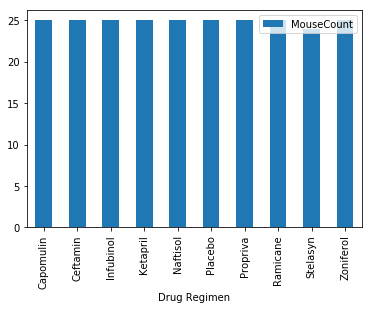

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
%matplotlib inline
Tratment_MouseCount = mouse_metadata[['Drug Regimen','Mouse ID' ]].groupby('Drug Regimen'
                                                                          ).agg({'Mouse ID': [('MouseCount', 'count')]})
Tratment_MouseCount.columns = Tratment_MouseCount.columns.droplevel()
Tratment_MouseCount.plot(kind='bar')

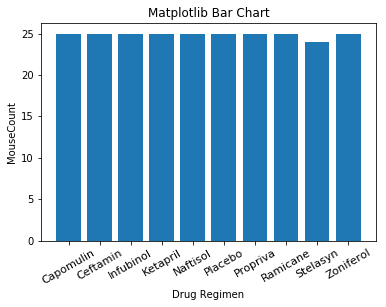

In [11]:
df = Tratment_MouseCount.reset_index()

plt.bar(df.index, df['MouseCount'].values)
plt.xticks(df.index, df['Drug Regimen'], fontsize=11, rotation=30)
plt.title('Matplotlib Bar Chart')
plt.xlabel('Drug Regimen')
plt.ylabel('MouseCount')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1F6BD6630>], dtype=object)

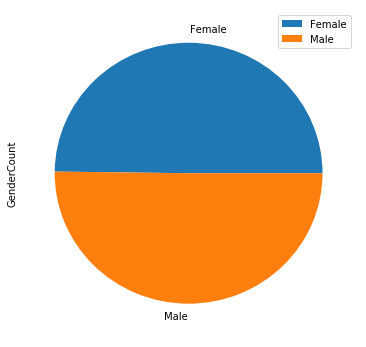

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_metadata2 = mouse_metadata.copy()
mouse_metadata2['GenderCount'] = 1
Female_MaleCount = mouse_metadata2[['Sex', 'GenderCount']].groupby('Sex').sum()
#Female_MaleCount
Female_MaleCount.plot.pie(subplots=True, figsize=(6, 6))

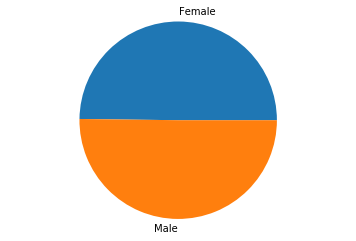

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig1, ax1 = plt.subplots()
ax1.pie(Female_MaleCount.reset_index().GenderCount, 
        labels = Female_MaleCount.reset_index().Sex, 
        radius=2)

ax1.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = study_results[['Mouse ID', 'Timepoint']].groupby('Mouse ID').max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
study_results_maxTimepoint = study_results.merge(max_timepoint, on = ['Mouse ID', 'Timepoint'])[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

Mouse_Study_Metadata_maxTP = study_results_maxTimepoint.merge(mouse_metadata, on = 'Mouse ID', how = 'outer')

In [15]:
# Put treatments into a list for for loop (and later for plot labels)

Treatment_list = mouse_metadata['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

from scipy import stats
from scipy.stats.mstats import mquantiles

for treatment in Treatment_list: 
    data = Mouse_Study_Metadata_maxTP[Mouse_Study_Metadata_maxTP['Drug Regimen']==treatment]
    Q1 = data[['Drug Regimen','Tumor Volume (mm3)']].quantile(0.25)[0] 
    Q3 = data[['Drug Regimen','Tumor Volume (mm3)']].quantile(0.75)[0] 
    IQR = Q3-Q1
    
    Upper_outlier = data[data['Tumor Volume (mm3)']> (Q3.item()+1.5*IQR)]
    Lower_outlier = data[data['Tumor Volume (mm3)']< (Q1.item()-1.5*IQR)]
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    Outlier = Upper_outlier.append(Lower_outlier, ignore_index=True)
    if len(Outlier):
        tumor_vol.append(Outlier['Tumor Volume (mm3)'].unique())

print('Outlier: ')        
print(tumor_vol)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Outlier: 
[array([ 36.3213458])]


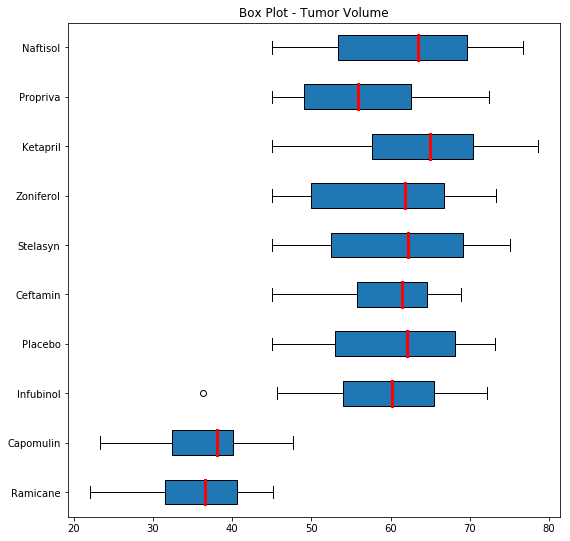

In [16]:
d_Ramicane = Mouse_Study_Metadata_maxTP[Mouse_Study_Metadata_maxTP['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)'].unique()
d_Capomulin = Mouse_Study_Metadata_maxTP[Mouse_Study_Metadata_maxTP['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'].unique()
d_Infubinol = Mouse_Study_Metadata_maxTP[Mouse_Study_Metadata_maxTP['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)'].unique()
d_Placebo = Mouse_Study_Metadata_maxTP[Mouse_Study_Metadata_maxTP['Drug Regimen']=='Placebo']['Tumor Volume (mm3)'].unique()
d_Ceftamin = Mouse_Study_Metadata_maxTP[Mouse_Study_Metadata_maxTP['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)'].unique()
d_Stelasyn = Mouse_Study_Metadata_maxTP[Mouse_Study_Metadata_maxTP['Drug Regimen']=='Stelasyn']['Tumor Volume (mm3)'].unique()
d_Zoniferol = Mouse_Study_Metadata_maxTP[Mouse_Study_Metadata_maxTP['Drug Regimen']=='Zoniferol']['Tumor Volume (mm3)'].unique()
d_Ketapril = Mouse_Study_Metadata_maxTP[Mouse_Study_Metadata_maxTP['Drug Regimen']=='Ketapril']['Tumor Volume (mm3)'].unique()
d_Propriva = Mouse_Study_Metadata_maxTP[Mouse_Study_Metadata_maxTP['Drug Regimen']=='Propriva']['Tumor Volume (mm3)'].unique()
d_Naftisol = Mouse_Study_Metadata_maxTP[Mouse_Study_Metadata_maxTP['Drug Regimen']=='Naftisol']['Tumor Volume (mm3)'].unique()

fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(235)

boxplt = ax.boxplot([d_Ramicane, d_Capomulin,d_Infubinol, d_Placebo,d_Ceftamin, d_Stelasyn, 
                     d_Zoniferol,d_Ketapril,d_Propriva, d_Naftisol], vert=0, patch_artist=True)
for median in boxplt['medians']:
    median.set(color='red', linewidth=3)
    
ax.set_yticklabels(Treatment_list)
ax.set_title('Box Plot - Tumor Volume')
plt.show(boxplt)


## Line and Scatter Plots

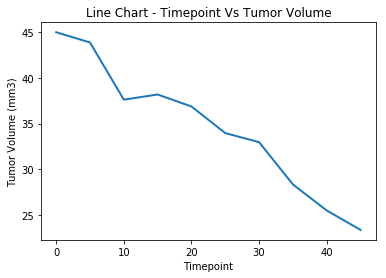

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
results_Capomulin = result1[(result1['Drug Regimen']=='Capomulin')][['Timepoint','Mouse ID', 'Tumor Volume (mm3)']]
results_Capomulin_s185 = results_Capomulin[results_Capomulin['Mouse ID'] =='s185']
plt.plot(results_Capomulin_s185['Timepoint'], results_Capomulin_s185['Tumor Volume (mm3)'], linewidth=2.0)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Line Chart - Timepoint Vs Tumor Volume')
plt.show()

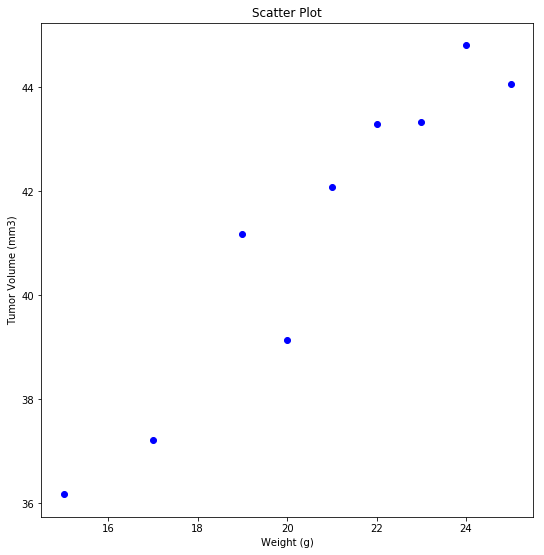

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
results_Capomulin2 = result1[(result1['Drug Regimen']=='Capomulin')][['Weight (g)','Mouse ID', 'Tumor Volume (mm3)']]
results_Capomulin2 = results_Capomulin3.groupby('Weight (g)').mean().reset_index()
results_Capomulin2.rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume'},inplace=True)
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(235)

ax.scatter(results_Capomulin2['Weight (g)'], results_Capomulin2['Avg Tumor Volume'], color='b')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Tumor Volume (mm3)')
plt.title('Scatter Plot')
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
results_Capomulin3 = result1[(result1['Drug Regimen']=='Capomulin')][['Weight (g)','Mouse ID', 'Tumor Volume (mm3)']]
results_Capomulin3 = results_Capomulin3.groupby('Weight (g)').mean().reset_index()
results_Capomulin3.rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume'},inplace=True)
print('Correlation:')
results_Capomulin3.corr(method='pearson')

Correlation:


,Weight (g),Avg Tumor Volume
Weight (g),1.000000,0.950524
Avg Tumor Volume,0.950524,1.000000


### Linear Regression with Scatter Plot

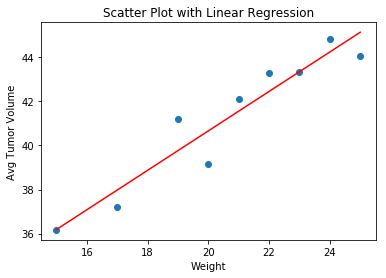

In [28]:
from sklearn.linear_model import LinearRegression
X = results_Capomulin3['Weight (g)'].values.reshape(-1,1)
Y = results_Capomulin3['Avg Tumor Volume'].values.reshape(-1,1)
linearReg = LinearRegression()
linearReg.fit(X,Y)

Y_pred = linearReg.predict(X)
plt.scatter(X,Y)
plt.title('Scatter Plot with Linear Regression')
plt.xlabel('Weight')
plt.ylabel('Avg Tumor Volume')
plt.plot(X, Y_pred, color='red')
plt.show()